In [1]:
import moments
import matplotlib
import numpy as np
import pickle

In [2]:
with open("/scratch/djb3ve/connor/data_dict.pickle", "rb") as f:
    data_dict = pickle.load(f)

In [3]:
ns = [20, 20]
pop_ids = ["Daphnia.pulex.NorthAmerica", "Daphnia.pulex.Europe"]
fs_data = moments.Spectrum.from_data_dict(data_dict, pop_ids=pop_ids,
                                          projections=ns,
                                          polarized=False)

In [4]:
moments.Plotting.plot_single_2d_sfs(fs_data, vmin = 1, cmap="viridis", out="fs_data", dpi=500)
np.savetxt("sfs_output/fs_data.csv", fs_data, delimiter=",")

TypeError: plot_single_2d_sfs() got an unexpected keyword argument 'dpi'

In [6]:
params = [6.358476, 1.032427, 9.989897, 0.007727318]
fs_split_mig_model = moments.Demographics2D.split_mig(params, 
                                                      ns, 
                                                      pop_ids=pop_ids).fold()

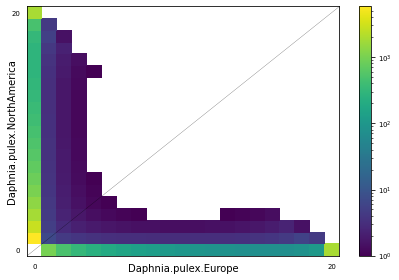

In [7]:
theta = moments.Inference.optimal_sfs_scaling(fs_split_mig_model, fs_data)
moments.Plotting.plot_single_2d_sfs(fs_split_mig_model * theta, vmin = 1, cmap="viridis", out="fs_split_mig_model")
np.savetxt("sfs_output/fs_split_mig_model.csv", fs_split_mig_model * theta, delimiter=",")

In [8]:
params = [1.065988, 0.2213014, 0.8256301, 0]
fs_split_no_mig_model = moments.Demographics2D.split_mig(params, 
                                                         ns, 
                                                         pop_ids=pop_ids).fold()

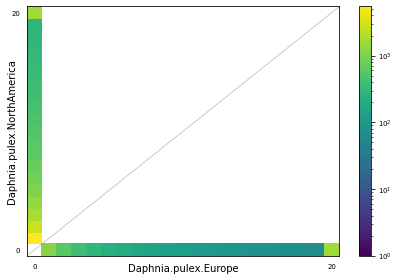

In [9]:
theta = moments.Inference.optimal_sfs_scaling(fs_split_no_mig_model, fs_data)
moments.Plotting.plot_single_2d_sfs(fs_split_no_mig_model * theta, vmin=1, cmap="viridis", out="fs_split_no_mig_model")
np.savetxt("sfs_output/fs_split_no_mig_model.csv", fs_split_no_mig_model * theta, delimiter=",")

In [11]:
# THIS IS NOT DONE CORRECTLY, IGNORE EVERYTHING BELOW THIS LINE FOR NOW
params = [700000, 200000, 1000000/2, 0]
fs_true = moments.Demographics2D.split_mig(params, 
                                           ns, 
                                           pop_ids=pop_ids).fold()

In [60]:
moments.Inference.ll_multinom(fs_true, fs_data)

-11703.929249771903

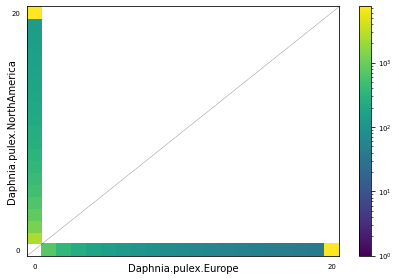

In [48]:
theta = moments.Inference.optimal_sfs_scaling(fs_true, fs_data)
moments.Plotting.plot_single_2d_sfs(fs_true * theta, vmin=1, cmap="viridis", out="fs_split_no_mig_model")

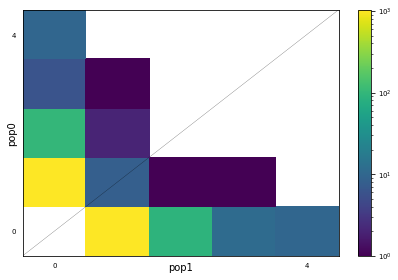

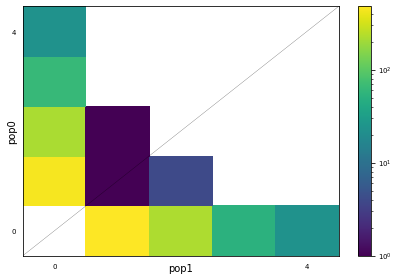

In [27]:
# Checking that I implemented binom rounding correctly
dir = "/scratch/djb3ve/Demographic-inference-with-pool-seq-data/simulated_data/data9/"
name = "n10pz7po7t5m2ms1d5ps1.npy"
fs_count = np.load(dir + "counts_sfss/" + name)
fs_count = moments.Spectrum(fs_count)
fs_binom = np.load(dir + "binom_sfss/" + name)
fs_binom = moments.Spectrum(fs_binom)
moments.Plotting.plot_single_2d_sfs(fs_count, vmin=1, cmap="viridis")
moments.Plotting.plot_single_2d_sfs(fs_binom, vmin=1, cmap="viridis")